In [8]:
#installing packages 

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
%matplotlib inline


In [9]:
start = datetime.datetime(2018, 1, 2)
end = datetime.datetime(2019, 4, 1)

tickers = ['AAPL','WMT', 'TM','KO','BA']
stocks = pd.DataFrame()
for x in tickers:
    stocks[x] = web.DataReader(x, 'yahoo', start, end)['Close']

stocks.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-27,188.470001,97.209999,121.029999,46.610001,374.209991
2019-03-28,188.720001,97.129997,119.070000,46.580002,374.440002
2019-03-29,189.949997,97.529999,118.019997,46.860001,381.420013
2019-04-01,191.240005,97.820000,119.879997,46.720001,391.540009
2019-04-02,194.020004,96.940002,120.650002,46.570000,390.750000


In [10]:
stocks_return = (stocks/stocks.shift(1))-1
stocks_return.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-27,0.008994,-0.011290,-0.006077,-0.000643,0.010341
2019-03-28,0.001326,-0.000823,-0.016194,-0.000644,0.000615
2019-03-29,0.006518,0.004118,-0.008818,0.006011,0.018641
2019-04-01,0.006791,0.002973,0.015760,-0.002988,0.026532
2019-04-02,0.014537,-0.008996,0.006423,-0.003211,-0.002018


In [11]:
portfolio_weights = np.array(np.random.random(5))
portfolio_weights
portfolio_weights = portfolio_weights/np.sum(portfolio_weights)
portfolio_weights

array([ 0.33646257,  0.01936355,  0.26193201,  0.11784181,  0.26440006])

In [12]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis = 1)

In [13]:
#Calculating the returns of the portfolio

stocks_return['Portfolio'] = weighted_returns_portfolio.sum(axis=1).dropna()


In [14]:
CumulativeReturns = ((1+stocks_return["Portfolio"]).cumprod()-1)

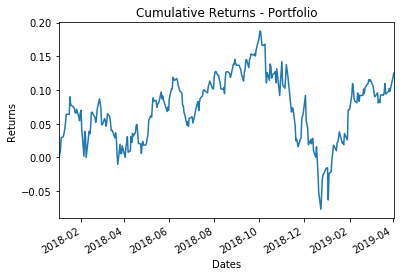

In [21]:
CumulativeReturns.plot()
_ = plt.xlabel('Dates')

_ = plt.ylabel('Returns')

_ = plt.title('Cumulative Returns - Portfolio')



plt.show()



In [24]:
running_maximum = np.maximum.accumulate(CumulativeReturns)
running_maximum.tail()

Date
2019-03-27    0.187047
2019-03-28    0.187047
2019-03-29    0.187047
2019-04-01    0.187047
2019-04-02    0.187047
Name: Portfolio, dtype: float64

In [26]:
running_maximum = running_maximum < 1 

In [30]:
portfolio_drawdown = (CumulativeReturns)/running_max - 1
drawdown.tail()

Date
2019-03-27   -0.453543
2019-03-28   -0.475492
2019-03-29   -0.442616
2019-04-01   -0.365079
2019-04-02   -0.332257
Name: Portfolio, dtype: float64

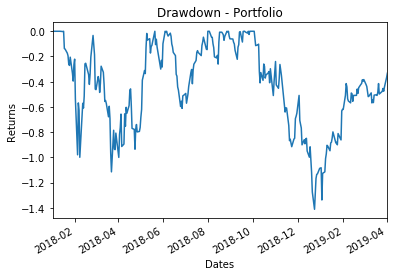

In [32]:
drawdown.plot()

_ = plt.xlabel('Dates')

_ = plt.ylabel('Returns')

_ = plt.title('Drawdown - Portfolio')

plt.show()